In [3]:
#!pip install patool

Defaulting to user installation because normal site-packages is not writeable


In [11]:
#import patoolib as pt

In [35]:
#pt.extract_archive("Downloads/archive_insurance.zip",outdir='Documents/')

INFO patool: Extracting Downloads/archive_insurance.zip ...
INFO patool: could not find a 'file' executable, falling back to guess mime type by file extension
INFO patool: ... Downloads/archive_insurance.zip extracted to `Documents/'.


'Documents/'

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('Documents/insurance.csv')

In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
data['region'].count

<bound method Series.count of 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object>

In [209]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [59]:
data.drop(['sex','smoker','region'],axis=1).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


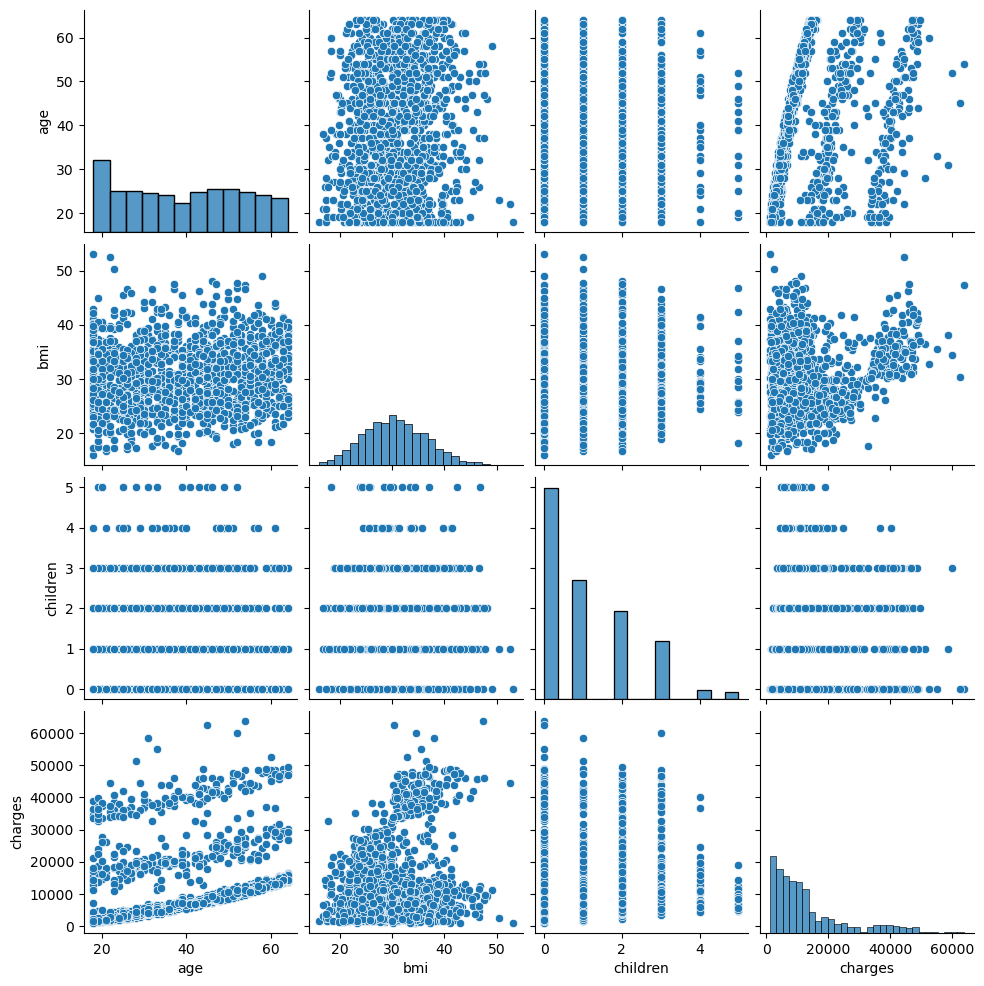

In [67]:
sns.pairplot(data)

In [119]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [121]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [125]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [141]:
smoke_col = data['smoker'].map({'yes':1,'no':0})
sex_col = data['sex'].map({'female':1,'male':0})

In [137]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [153]:
data['sex'] = sex_col

In [159]:
data['smoker'] = smoke_col

In [173]:
#data.drop('smoke',inplace=True, axis=1)

In [169]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [183]:
data.drop('region',axis=1).corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


In [185]:
tmp = data.drop('region',axis=1)

In [211]:
from pandas.plotting import scatter_matrix 

In [217]:
attributes = ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='smoker', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='bmi', ylabel='sex'>,
        <Axes: xlabel='children', ylabel='sex'>,
        <Axes: xlabel='smoker', ylabel='sex'>,
        <Axes: xlabel='charges', ylabel='sex'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='sex', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='smoker', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='sex', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel=

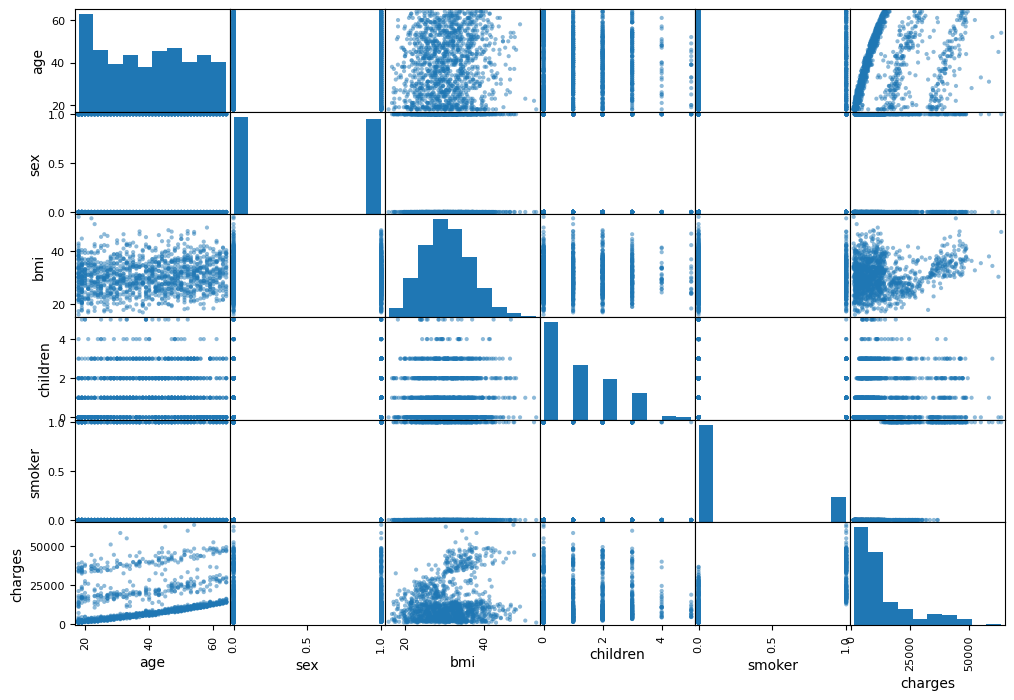

In [219]:
scatter_matrix(tmp[attributes],figsize=(12,8))

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='smoker', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='smoker'>,
        <Axes: xlabel='smoker', ylabel='smoker'>,
        <Axes: xlabel='charges', ylabel='smoker'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='smoker', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

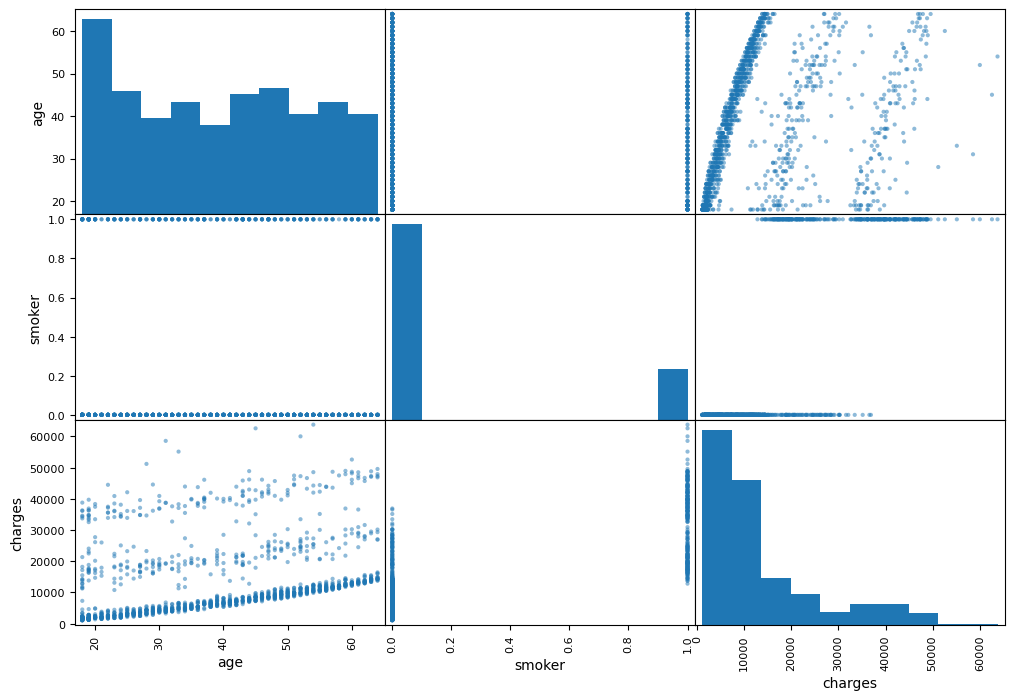

In [227]:
#attributes = ['age','smoker', 'charges']
scatter_matrix(tmp[['age','smoker','charges']],figsize=(12,8))

In [229]:
from sklearn.preprocessing import OneHotEncoder

In [231]:
one_enc = OneHotEncoder()

In [251]:
data_cat = data[['region']]

In [253]:
data_cat.head()

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest


In [255]:
encoded_data = one_enc.fit_transform(data_cat)

In [297]:
encoded_data.toarray()[0]

array([0., 0., 0., 1.])

In [271]:
one_enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [277]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [299]:
encoded_data.shape[0]

1338

In [303]:
x = encoded_data.toarray()

In [322]:
x.shape

(1338, 4)

In [326]:
one_enc.get_feature_names_out()

array(['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [328]:
enc_df = pd.DataFrame(x,columns=one_enc.get_feature_names_out())

In [332]:
tmp_df = enc_df

In [338]:
data = pd.concat([data,tmp_df],axis=1)

In [344]:
data.drop('region',inplace=True,axis=1)

In [346]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [372]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

array([[<Axes: xlabel='region_northeast', ylabel='region_northeast'>,
        <Axes: xlabel='region_northwest', ylabel='region_northeast'>,
        <Axes: xlabel='region_southeast', ylabel='region_northeast'>,
        <Axes: xlabel='region_southwest', ylabel='region_northeast'>,
        <Axes: xlabel='charges', ylabel='region_northeast'>],
       [<Axes: xlabel='region_northeast', ylabel='region_northwest'>,
        <Axes: xlabel='region_northwest', ylabel='region_northwest'>,
        <Axes: xlabel='region_southeast', ylabel='region_northwest'>,
        <Axes: xlabel='region_southwest', ylabel='region_northwest'>,
        <Axes: xlabel='charges', ylabel='region_northwest'>],
       [<Axes: xlabel='region_northeast', ylabel='region_southeast'>,
        <Axes: xlabel='region_northwest', ylabel='region_southeast'>,
        <Axes: xlabel='region_southeast', ylabel='region_southeast'>,
        <Axes: xlabel='region_southwest', ylabel='region_southeast'>,
        <Axes: xlabel='charges', yla

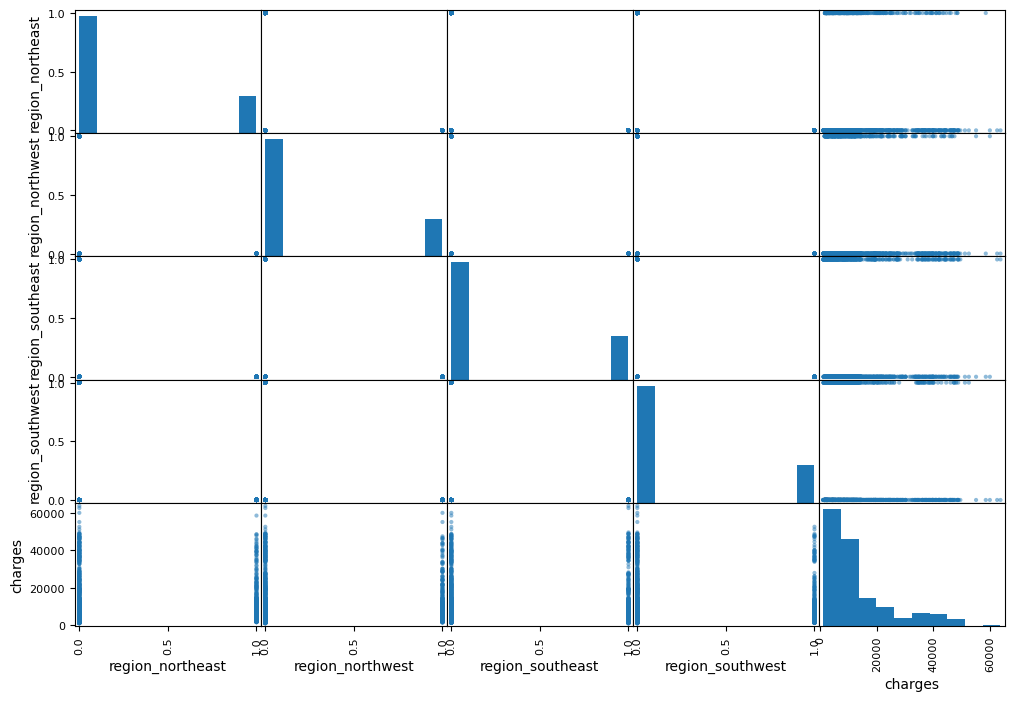

In [376]:
scatter_matrix(data[['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest','charges']],figsize=(12,8))

In [395]:
data.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [401]:
X = data.drop('charges',axis=1)
Y = data['charges']

## Training Model

In [387]:
from sklearn.linear_model import LinearRegression

In [389]:
lin_reg = LinearRegression()

In [393]:
from sklearn.model_selection import train_test_split

In [419]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [429]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((1070, 9), (268, 9), (1070,), (268,))

In [515]:
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

In [519]:
x_test.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
764,45,1,25.175,2,0,1.0,0.0,0.0,0.0
887,36,1,30.020,0,0,0.0,1.0,0.0,0.0
890,64,1,26.885,0,1,0.0,1.0,0.0,0.0
1293,46,0,25.745,3,0,0.0,1.0,0.0,0.0
259,19,0,31.920,0,1,0.0,1.0,0.0,0.0


In [409]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [413]:
from sklearn.metrics import accuracy_score

In [495]:
pred = lin_reg.predict(x_test)

In [497]:
pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [463]:
from sklearn.metrics import mean_squared_error

In [467]:
mse = mean_squared_error(y_test,pred)

In [469]:
mse

33596915.851361476

In [535]:
x = x_test.iloc[54]
y = y_test.iloc[54]

In [537]:
x = pd.DataFrame(x)

In [539]:
lin_reg.predict(x.T)

array([13389.06105161])

In [541]:
y

10594.2257

In [509]:
lin_reg.score(x_test,y_test)

0.7835929767120722

In [547]:
from sklearn.model_selection import cross_val_score

In [551]:
scores = cross_val_score(lin_reg,X,Y,scoring="neg_mean_squared_error",cv=10)

In [557]:
scr = np.sqrt(-scores)
print(scr)

[5976.341527   6195.26280882 6087.49837639 6272.60959519 6213.0390518
 5158.0730869  5545.81496853 6963.65822965 5772.90904994 6451.23213057]


In [565]:
scr.mean()

6063.643882478557

In [567]:
scr.std()

471.64418087942187

In [569]:
from sklearn.svm import SVR

In [601]:
svm = SVR(C=100)

In [603]:
svm.fit(x_train,y_train)

SVR(C=100)

In [605]:
svm_pred = svm.predict(x_test)

In [607]:
svm.score(x_test,y_test)

-0.08672886753740316

In [611]:
from sklearn.metrics import r2_score

In [613]:
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")

R-squared: 0.7835929767120722


In [615]:
svm_score = cross_val_score(svm,X,Y,scoring="r2",cv=10)

In [621]:
svm_score.mean()

-0.15215343392746458

In [627]:
from sklearn.svm import LinearSVR

In [668]:
svm_lin = LinearSVR(C=1000)

In [670]:
svm_lin.fit(x_test,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(C=1000)

In [672]:
svm_lin.predict(x_test)

array([ 8998.90893323,  5796.92555577, 27394.833083  ,  9084.27156844,
       16129.0452505 ,  5084.97918691,  1630.44788046, 12175.29485895,
        3925.2372019 ,  9833.16835731, 19733.68551407,  7466.17884501,
        4048.5519024 , 23582.70448458, 25593.88909184, 23343.38587668,
        9438.13828906, 23318.35153428,  8138.92275298, 22326.01517304,
        4560.75133146,  7622.66134242,   907.21861054,  2666.45018648,
       10516.14540044, 10330.4117133 , 11289.42996949,  4983.76740086,
        9493.64379185,   499.68543823,  8221.17502125, 10880.9311737 ,
        1710.00253024,  5619.9554095 ,  3045.45720538,  7771.61177928,
        2254.70540474,  7594.34544539, 24927.1827893 , 20204.82319158,
        3598.46546334,  2434.5020004 , 10781.82913554, 10863.71820211,
        5071.47020469, 10989.70688585,  3110.71339413,  4106.52126471,
       22804.90477222,  4610.93924242, 11859.67071715,   945.20479331,
        7310.33536953,  1139.45334138,  9707.9292334 ,  9817.72223308,
      

In [674]:
pred=svm_lin.predict(x_test)

In [676]:
r2 = r2_score(y_test, pred)
r2

0.5805674193181842

svm_lin.score(y_test,pred)

In [681]:
from sklearn.ensemble import RandomForestRegressor

In [689]:
rnd_clf = RandomForestRegressor(n_estimators=1000,max_depth=2)

In [691]:
rnd_clf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, n_estimators=1000)

In [693]:
pred = rnd_clf.predict(x_test)

In [697]:
r2 = r2_score(y_test,pred)

In [701]:
r2

0.8422961628081893

In [703]:
cv_score = cross_val_score(rnd_clf,X,Y,cv=10,scoring="r2")

In [705]:
cv_score

array([0.87168491, 0.82939621, 0.81000654, 0.72855349, 0.82840039,
       0.8930069 , 0.85312126, 0.7831364 , 0.84101007, 0.82166105])

In [707]:
cv_score.mean()

0.825997722357771

In [709]:
from sklearn.model_selection import GridSearchCV

In [711]:
param = [
    {'n_estimators':[10,100,500],'max_features':[4,5,6],'max_depth':[2,5,8]},
     {'n_estimators':[50,100,200],'max_features':[4,5,6]},
]

In [713]:
frst_reg = RandomForestRegressor()

In [715]:
grid_search = GridSearchCV(frst_reg,param,cv=10,scoring="r2",return_train_score=True)

In [717]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 5, 8], 'max_features': [4, 5, 6],
                          'n_estimators': [10, 100, 500]},
                         {'max_features': [4, 5, 6],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='r2')

In [718]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 6, 'n_estimators': 500}

In [731]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=5, max_features=6, n_estimators=500)


In [725]:
param2 = [
    {'n_estimators':[500,1000],'max_features':[6,7,8],'max_depth':[5,6,7]},
]

In [727]:
grid_search2 = GridSearchCV(frst_reg,param2,cv=10,scoring="r2",return_train_score=True)

In [729]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 5, 8], 'max_features': [4, 5, 6],
                          'n_estimators': [10, 100, 500]},
                         {'max_features': [4, 5, 6],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='r2')

In [730]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 6, 'n_estimators': 500}

In [737]:
fin_rnd_clf = RandomForestRegressor(max_depth=5, max_features= 6, n_estimators= 500)

In [739]:
fin_rnd_clf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features=6, n_estimators=500)

In [741]:
rnd_pred = fin_rnd_clf.predict(x_test)

In [743]:
r2 = r2_score(y_test,rnd_pred)

In [745]:
r2

0.8789967721419155

In [747]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [751]:
data.drop(['region_northeast','region_northwest','region_southeast','region_southwest'],axis=1,inplace=True)

In [755]:
X_trimed = data.drop(['charges'],axis=1)
Y_trimed = data['charges']

In [767]:
xtrain,xtest,ytrain,ytest = train_test_split(X_trimed,Y_trimed,test_size=0.2,shuffle=True)

In [777]:
xtest.shape

(268, 5)

In [779]:
pure_rnd_clf = RandomForestRegressor(max_depth=5, max_features= 6, n_estimators= 500)

In [781]:
pure_rnd_clf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=5, max_features=6, n_estimators=500)

In [783]:
pure_preds = pure_rnd_clf.predict(xtest)

In [785]:
r2 = r2_score(ytest,pure_preds)

In [787]:
r2

0.8760416018985477

In [789]:
from sklearn.svm import SVR

In [827]:
param_svm = [
    {'kernel':['rbf','linear','poly'],'C':[100,500,1000], 'epsilon':[0.1,0.2,0.3],'degree':[2,3,4]},
    {'kernel':['rbf','linear','poly'],'C':[1,2,3], 'epsilon':[0.1,0.2,0.3,0.4,0.5,0.6],'degree':[2,3,4,]},
    {'kernel':['rbf','linear','poly'],'C':[10,20,30], 'epsilon':[0.1,0.2,0.3,0.4,0.5,0.6],'degree':[2,3,4]},
  #  {'kernel':'linear','C':[100,500,1000], 'epsilon':[0.1,0.2,0.3],'degree':[2,3,4]},
   # {'kernel':'poly','C':[100,500,1000], 'epsilon':[0.1,0.2,0.3],'degree':[2,3,4]},
]

In [829]:
fin_svm = SVR()

In [831]:
svm_grid_search = GridSearchCV(fin_svm,param_svm,cv=10,scoring="r2",return_train_score=True)

In [833]:
svm_grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [100, 500, 1000], 'degree': [2, 3, 4],
                          'epsilon': [0.1, 0.2, 0.3],
                          'kernel': ['rbf', 'linear', 'poly']},
                         {'C': [1, 2, 3], 'degree': [2, 3, 4],
                          'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                          'kernel': ['rbf', 'linear', 'poly']},
                         {'C': [10, 20, 30], 'degree': [2, 3, 4],
                          'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                          'kernel': ['rbf', 'linear', 'poly']}],
             return_train_score=True, scoring='r2')

In [837]:
svm_grid_search.best_params_

{'C': 1000, 'degree': 2, 'epsilon': 0.3, 'kernel': 'linear'}

In [815]:
pure_fin_svm = SVR(C= 1000, degree = 2, epsilon= 0.3, kernel = 'linear')

In [817]:
pure_fin_svm.fit(xtrain,ytrain)

SVR(C=1000, degree=2, epsilon=0.3, kernel='linear')

In [821]:
svm_preds=pure_fin_svm.predict(xtest)

In [823]:
r2 = r2_score(ytest,svm_preds)

In [825]:
r2

0.6460903237958411